## Importing required libraries
import pandas as pd #for data preprocessing
#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
#Linear Algebra
import numpy as np
#Import Datetime module
from datetime import datetime
#Import For splitting
from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split 
#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
#To ignore unnecessary warnings
import warnings
#for encoding categorical variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

In [1]:
import pandas as pd #for data preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

from datetime import datetime

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV,train_test_split #For splitting

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

## Import Datasets: train.csv, test.csv

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

## Create submission file using an empty/dummy dataframe

In [4]:
submission_file = pd.DataFrame(columns=['ID', 'Response'])
submission_file.head() 

,ID,Response


In [6]:
#Save test ID in a copy for creating submission file later
submission_file.ID = test_data.ID
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


## check for missing values

In [8]:
train_data.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [9]:
test_data.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

There are 16 and 8 missing values in the train_data and test_data of the Disposable income column respectively 

## Check for dtypes in train and test datasets with .info method

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       672 non-null    object 
 1   Year_of_Birth            672 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Marital_Status           672 non-null    object 
 4   Disposable_Income        664 non-null    float64
 5   No_of_Kids_in_home       672 non-null    int64  
 6   No_of_Teen_in_home       672 non-null    int64  
 7   Date_Customer            672 non-null    object 
 8   Recency                  672 non-null    int64  
 9   Discounted_Purchases     672 non-null    int64  
 10  WebPurchases             672 non-null    int64  
 11  CatalogPurchases         672 non-null    int64  
 12  StorePurchases           672 non-null    int64  
 13  Amount_on_Wines          672 non-null    int64  
 14  Amount_on_Fruits         6

Apart from the ID column(which is just the indentifier), there are 3 categorical columns (object dtype) and 23 numerical columns excluding the target column(Response column) as defined in the problem statement.

## Drop ID column and convert Date column to Datetime
ID column wouldn't be useful for modelling 
Convert Date column to Datetime for pandas to recognise. It'd useful for feature engineering later

In [13]:
#Drop ID from train and test datasets
train_data.drop('ID', axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)

In [14]:
#Convert Datetime
train_data['Date_Customer'] = pd.to_datetime(train_data['Date_Customer'])
test_data['Date_Customer'] = pd.to_datetime(test_data['Date_Customer'])

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_of_Birth            1568 non-null   int64         
 1   Education_Level          1568 non-null   object        
 2   Marital_Status           1568 non-null   object        
 3   Disposable_Income        1552 non-null   float64       
 4   No_of_Kids_in_home       1568 non-null   int64         
 5   No_of_Teen_in_home       1568 non-null   int64         
 6   Date_Customer            1568 non-null   datetime64[ns]
 7   Recency                  1568 non-null   int64         
 8   Discounted_Purchases     1568 non-null   int64         
 9   WebPurchases             1568 non-null   int64         
 10  CatalogPurchases         1568 non-null   int64         
 11  StorePurchases           1568 non-null   int64         
 12  Amount_on_Wines          1568 non-

There are 23 numerical columns including target column, a Datetime and 2 categorical columns.

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Year_of_Birth            672 non-null    int64         
 1   Education_Level          672 non-null    object        
 2   Marital_Status           672 non-null    object        
 3   Disposable_Income        664 non-null    float64       
 4   No_of_Kids_in_home       672 non-null    int64         
 5   No_of_Teen_in_home       672 non-null    int64         
 6   Date_Customer            672 non-null    datetime64[ns]
 7   Recency                  672 non-null    int64         
 8   Discounted_Purchases     672 non-null    int64         
 9   WebPurchases             672 non-null    int64         
 10  CatalogPurchases         672 non-null    int64         
 11  StorePurchases           672 non-null    int64         
 12  Amount_on_Wines          672 non-nul

There are 22 numerical columns excluding target column, a Datetime and 2 categorical columns.

## We can separate catgorical and numerical column

In [18]:
#categorical_columns == categorical columns excluding Date column
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns

#numerical_columns == numerical columns + date column included
numerical_columns = [col for col in train_data.columns if col not in categorical_columns]

print(f'The Categorical Columns are: {categorical_columns}')
print(f'The Numerical Columns are: {numerical_columns}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response']


In [22]:
#categ_cols == categorical columns . Date column excluded
categorical_columns = test_data.select_dtypes(include=['object', 'category']).columns

#numerical_columns == numerical columns + date column included
numerical_columns = [col for col in test_data.columns if col not in categorical_columns]
print(f'The Categorical Columns are: {categorical_columns}')
print(f'The Numerical Columns are: {numerical_columns}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Year_of_Birth', 'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain']


## check for unique entries in each categorical column

In [19]:
for col in categorical_columns:
    print(f'Unique entries in the {col} column in the train set is: {train_data[col].nunique()}')
    print(f'and the unique entries are: {train_data[col].unique()}')

Unique entries in the Education_Level column in the train set is: 5
and the unique entries are: ['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
Unique entries in the Marital_Status column in the train set is: 8
and the unique entries are: ['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
for col in categorical_columns:
    print(f'Unique entries in the {col} column in the test set is: {test_data[col].nunique()}')
    print(f'and the unique entries are: {test_data[col].unique()}')

Unique entries in the Education_Level column in the test set is: 5
and the unique entries are: ['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']
Unique entries in the Marital_Status column in the test set is: 6
and the unique entries are: ['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


There are 8 in the unique entries of train dataset for the Marital column and 6 in the test dataset.
Noted particularly for encoding

## check unique entries in Target column

In [23]:
print(f'Unique entries in the Target column in  is: {train_data.Response.nunique()}')
print(f'and the unique entries are: {train_data.Response.unique()}')

Unique entries in the Target column in  is: 2
and the unique entries are: [0 1]


## Plot the Target column

<AxesSubplot:>

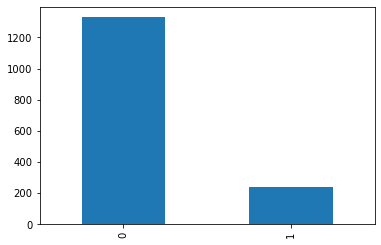

In [24]:
train_data.Response.value_counts().plot(kind='bar')

## Filling missing values using the mean method for train and test datasets

In [25]:
train_data['Disposable_Income'].dtype

dtype('float64')

In [26]:
train_data['Disposable_Income'].fillna((train_data['Disposable_Income'].mean()) , inplace = True)

#check again to make sure
train_data.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [27]:
test_data['Disposable_Income'].fillna((test_data['Disposable_Income'].mean()) , inplace = True)
#check again to make sure
test_data.isnull().sum()

Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

## Read train and test datasets again

In [28]:
print(f'The Size of the train set is now: {train_data.shape}')
train_data.head()

The Size of the train set is now: (1568, 26)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,...,165,203,1,0,0,0,1,0,0,0


In [29]:
print(f'The Size of the train set is now: {test_data.shape}')
test_data.head()

The Size of the train set is now: (672, 25)


,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,1954,Graduation,Single,48556.8,0,1,2013-11-01,85,6,8,...,7,23,41,8,0,0,0,0,0,0
1,1961,Graduation,Widow,57499.2,0,1,2012-11-22,79,5,7,...,0,0,75,6,0,1,0,0,0,0
2,1973,Basic,Married,17025.6,0,0,2013-02-28,47,1,2,...,16,12,27,6,0,0,0,0,0,0
3,1970,Graduation,Together,91983.6,0,0,2013-08-16,98,1,4,...,219,189,126,2,0,0,1,1,0,0
4,1959,Graduation,Together,78235.2,0,2,2013-07-25,41,2,7,...,12,0,200,5,1,0,0,0,0,0


## Encoding Categorical Variables
Here, categorical variables would be encoded and Label Encoding will be applied to avoid mismatch of dimensionality in train and test that could be caused by dummy encoder.

In [30]:
# label encoding 
len = LabelEncoder()
for i in categorical_columns:
    train_data[i] = len.fit_transform(train_data[i])
    test_data[i] = len.fit_transform(test_data[i])
train_data.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,1955,2,2,77504.4,1,1,2014-06-22,56,2,1,...,6,20,3,0,0,0,0,0,0,0
1,1958,2,5,56784.0,0,1,2013-01-08,17,6,5,...,15,19,6,0,0,0,0,0,0,0
2,1962,2,4,103714.8,0,0,2013-11-21,17,0,7,...,18,37,2,0,0,0,1,0,0,1
3,1979,0,4,46311.6,1,0,2013-09-13,49,3,4,...,24,24,8,0,0,0,0,0,0,0
4,1959,2,3,87486.0,0,0,2014-01-21,59,1,3,...,165,203,1,0,0,0,1,0,0,0


## Build a model from the data(Modelling)

In [31]:
#Split into X and y
X = train_data.drop('Response', axis=1)
y = train_data.Response

In [32]:
#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import lightgbm as ligbm 
#install this library using pip install lgbm if you don't have it 
from catboost import CatBoostClassifier 
#Install this Library using pip install catboost, before importing if you don't have it 

In [35]:
#Creating model 
catbclassifier_model=CatBoostClassifier()

In [36]:
#Training Catboost Model on train set
catbclassifier_model.fit(X_train,y_train)

Learning rate set to 0.011348
0:	learn: 0.6822618	total: 65ms	remaining: 1m 4s
1:	learn: 0.6725836	total: 69.2ms	remaining: 34.6s
2:	learn: 0.6627476	total: 73.4ms	remaining: 24.4s
3:	learn: 0.6567526	total: 77ms	remaining: 19.2s
4:	learn: 0.6488705	total: 81.1ms	remaining: 16.1s
5:	learn: 0.6406509	total: 85.2ms	remaining: 14.1s
6:	learn: 0.6337459	total: 90.9ms	remaining: 12.9s
7:	learn: 0.6260298	total: 95.2ms	remaining: 11.8s
8:	learn: 0.6173809	total: 99.8ms	remaining: 11s
9:	learn: 0.6098781	total: 107ms	remaining: 10.6s
10:	learn: 0.6029120	total: 111ms	remaining: 10s
11:	learn: 0.5957231	total: 116ms	remaining: 9.52s
12:	learn: 0.5891919	total: 131ms	remaining: 9.92s
13:	learn: 0.5813739	total: 135ms	remaining: 9.49s
14:	learn: 0.5749975	total: 142ms	remaining: 9.31s
15:	learn: 0.5686697	total: 146ms	remaining: 9s
16:	learn: 0.5613215	total: 150ms	remaining: 8.7s
17:	learn: 0.5565140	total: 157ms	remaining: 8.59s
18:	learn: 0.5507901	total: 167ms	remaining: 8.6s
19:	learn: 0.54

In [37]:
#Predictiing on Test Set
y_pred_catb = catbclassifier_model.predict(X_test)

In [38]:
#Evaluating model using f1_score
print("Catboost F1 score on validation set is : ",f1_score(y_test,y_pred_catb))

Catboost F1 score on validation set is :  0.4776119402985074


In [39]:
#Now Predict on Test set
catb_preds = catbclassifier_model.predict(test_data)

In [40]:
#Save prediction to submission file created earlier
submission_file.Response = catb_preds
submission_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,0
4,ID_GOVUZ545,0


In [ ]:
#Save to Csv for submission
submission_file.to_csv('Baseline.csv', index=False)